# Handout #1 - Instanced Based Learning

### Marcos Balle Sánchez   ID: 43213875A

NOTA: En este notebook se ofrecen algunos comentarios en aquellas secciones donde es necesario algún tipo de justificación de algún paso o por algún error. Comentarios más generales sobre los diferentes pasos llevados a cabo pueden encontrarse en el documento facilitado para escribir el código fuente. 

Se cargan algunas librerías necesarias para el desarrollo de la práctica

In [429]:
import numpy as np 
from matplotlib import pyplot as plt
from qpsolvers import solve_qp
from sklearn import svm

Se definen dos funciones recurrentes en esta práctica

In [430]:
def build_H(x,y):
    H = np.zeros((y.shape[0], y.shape[0])) #NxN matrix, where N = number of examples
    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            H[i,j] = y[i]*y[j]*x[i,].T.dot(x[j,])
    
    return H

In [431]:
def build_H_wk(x, y, gamma, r, q):
    H = np.zeros((y.shape[0], y.shape[0])) #NxN matrix, where N = number of examples
    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            K = (gamma*x[i,].dot(x[j,]) +r)**q #Kernel
            H[i,j] = y[i]*y[j]*K
    
    return H

## Problema 1

### Apartado a)

Se carga el dataset

In [432]:
group = '02'
ds = 1
path = './in/datasets02/'
data = np.loadtxt(path+'ds'+group+str(ds)+'.txt')
X = data[:,0:2]
y = data[:,2:3] 

Se cambia la clase de 1 y 0  a 1 y -1

In [433]:
for i in range (y.shape[0]):
    if y[i] == 0:
        y[i] = -1

Se hallan las lamdas

In [434]:
N = y.shape[0]
y = y.reshape((N,))
P = build_H(X,y)
q = -np.ones((N,))
G = -np.identity(N)
h = np.zeros((N,))
A = y.reshape((1,-1))
b = np.zeros(1)

lm = solve_qp(P, q, G, h, A, b, solver='cvxopt')

In [435]:
lm = np.around(lm, decimals = 6)
print(lm)

[0.00000e+00 0.00000e+00 0.00000e+00 1.99963e-01 3.70000e-05 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.00000e-01
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]


Se ecnuentran los vectores de soporte

In [436]:
index_sv = lm != 0
sv = X[index_sv]
print('Suport vectors: ', sv, sep='')

Suport vectors: [[ 2.11239089  0.73335172]
 [-0.64568745 -4.95813349]
 [-0.73335172  2.11239089]]


Se halla el vector normal y el intercepto del hiperplano, $\omega$ y $\omega_0$

In [437]:
P = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,0.]])
q = np.zeros((3,))
G = np.zeros((N,3))
for i in range(0,N):
    G[i,0] = -y[i]*X[i,0]
    G[i,1] = -y[i]*X[i,1]
    G[i,2] = -y[i]
h = -np.ones((N,))

w = solve_qp(P, q, G, h, solver='cvxopt')
w

array([-5.69045626e-01,  2.76020166e-01, -3.73071042e-04])

### Apartado b)

Se plotea las muestras de entreno, resaltando  los vectores de soporte, y el hiperplano. 

In [438]:
def hyperplane(w,x,plane):  #funcion para devolver los valores del hiperplano y los márgenes
    y_val = np.zeros((x.shape[0],))
    
    if plane == 'hyper':
        for i in range(x.shape[0]):
            y_val[i] = (-w[0]/w[1])*x[i] + (-w[2]/w[1])
    
        return y_val
    elif plane == 'upper':
        for i in range(x.shape[0]):
            y_val[i] = (-w[0]/w[1])*x[i] + (-w[2]/w[1]) + 1/w[1] # Margen superior
    
        return y_val
    
    elif plane == 'lower':
        for i in range(x.shape[0]):
            y_val[i] = (-w[0]/w[1])*x[i] + (-w[2]/w[1]) - 1/w[1] #Margen inferior
    
        return y_val
    else:
        return 0

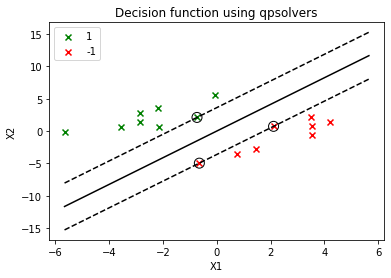

In [439]:
points = np.linspace(X.min(), X.max(), num = 50)

surf = hyperplane(w,points,'hyper')
upper = hyperplane(w,points,'upper')
low = hyperplane(w,points,'lower')

plt.scatter(X[y==1,0], X[y==1,1], c='g', marker='x', label = '1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r', marker='x', label = '-1')
plt.scatter(sv[:,0],sv[:,1], s=100, facecolors='none', edgecolors='k')
plt.plot(points,surf,c='k', linestyle='-')
plt.plot(points, upper, c='k',linestyle='--')
plt.plot(points, low, c='k',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision function using qpsolvers')
plt.legend();

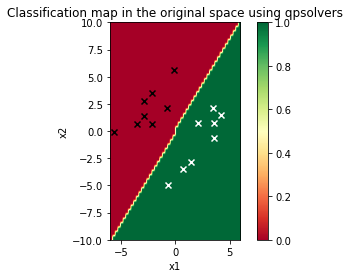

In [440]:
xx = np.linspace(-7, 7, num = 50)
yy = np.linspace(-15, 15, num = 50)
YY, XX = np.meshgrid(yy, xx)

Z = np.zeros((50 * 50,1)) 
k=0
for x1 in xx:
    for x2 in yy:
        Z[k] = x1*w[0] + x2*w[1] + w[2]
            
        k += 1
        
C = np.where(Z >= 0, 1, 0)
plt.figure()
plt.imshow(C.reshape(XX.shape), origin='lower', extent=(-6, 6, -10, 10), cmap='RdYlGn')
plt.colorbar()
plt.scatter(X[y==1,0], X[y==1,1], c='k', marker='x', label = '1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='w', marker='x', label = '-1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Classification map in the original space using qpsolvers')

plt.show(block=False)

### Apartado c)

In [441]:
# Se inicializa el objeto SVC y se hallan los vectores de soporte y parámetros del hiperplano
clf = svm.SVC(C = 1e16, kernel = 'linear')
clf.fit(X, y)
sv = clf.support_vectors_
w = clf.coef_.flatten()
w0 = clf.intercept_.flatten()

In [442]:
sv

array([[ 2.11239089,  0.73335172],
       [-0.64568745, -4.95813349],
       [-0.73335172,  2.11239089]])

In [443]:
w, w0

(array([-0.5690731 ,  0.27580877]), array([-1.77777778e-05]))

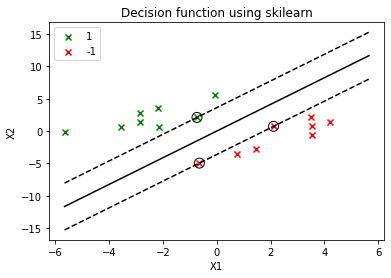

In [444]:
w = np.concatenate((w,w0))

#se reutiliza points de la anterior ejecucion
surf = hyperplane(w,points,'hyper')
upper = hyperplane(w,points,'upper')
low = hyperplane(w,points,'lower')

plt.scatter(X[y==1,0], X[y==1,1], c='g', marker='x', label = '1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r', marker='x', label = '-1')
plt.scatter(sv[:,0],sv[:,1], s=100, facecolors='none', edgecolors='k')
plt.plot(points,surf,c='k', linestyle='-')
plt.plot(points, upper, c='k',linestyle='--')
plt.plot(points, low, c='k',linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision function using skilearn')
plt.legend();

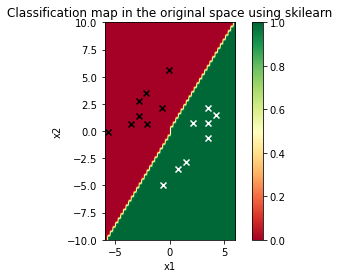

In [445]:
#se reutiliza xx e yy de la anterior ejecucion
Z = np.zeros((50 * 50,1)) 
k=0
for x1 in xx:
    for x2 in yy:
        Z[k] = x1*w[0] + x2*w[1] + w[2]
            
        k += 1
        
C = np.where(Z >= 0, 1, 0)
plt.figure()
plt.imshow(C.reshape(XX.shape), origin='lower', extent=(-6, 6, -10, 10), cmap='RdYlGn')
plt.colorbar()
plt.scatter(X[y==1,0], X[y==1,1], c='k', marker='x', label = '1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='w', marker='x', label = '-1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Classification map in the original space using skilearn')
plt.show(block=False)

## Problema 2

### Apartado a)

#### 1

In [446]:
def decision_func (points, x, w):
    y_val = np.zeros((x.shape[0],))
    
    if plane == 'hyper':
        for i in range(x.shape[0]):
            y_val[i] = (-w[0]/w[1])*x[i] + (-w[2]/w[1])
            
    elif plane == 'upper':
        for i in range(x.shape[0]):
            y_val[i] = (-w[0]/w[1])*x[i] + (-w[2]/w[1]) + 1/w[1]
    
    elif plane == 'lower':
        for i in range(x.shape[0]):
            y_val[i] = (-w[0]/w[1])*x[i] + (-w[2]/w[1]) - 1/w[1]
            
    else:
        return 0
    
    return y_val

In [447]:
group = '02'
ds = 2
path = './in/datasets02/'
data = np.loadtxt(path+'ds'+group+str(ds)+'.txt')
X = data[:,0:2]
y = data[:,2:3]

In [448]:
for i in range (y.shape[0]):
    if y[i] == 0:
        y[i] = -1

In [449]:
def build_H_wk(x, y):
    H = np.zeros((y.shape[0], y.shape[0])) #NxN matrix, where N = number of examples
    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            K = x[i,0]*x[i,1]*x[j,0]*x[j,1] + (x[i,0]**2)*(x[j,1]**2) + (x[i,1]**2)*(x[j,0]**2) + (x[i,0]**2)*(x[j,0]**2) + (x[i,1]**2)*(x[j,1]**2) #Kernel
            H[i,j] = y[i]*y[j]*K
    
    return H

In [450]:
def theta_transf(X): #transforma el vector de entrada al espacio de transformado
    x_trans = np.zeros(X.shape)
    i = 0
    for x in X:
        x_trans[i,0] = x[0]*x[1]
        x_trans[i,1] = x[0]**2 + x[1]**2
        i+=1
        
    return x_trans

In [451]:
N = y.shape[0]
y = y.reshape((N,))

P = build_H_wk(X, y)
q = -np.ones((N,))
G = -np.identity(N)
h = np.zeros((N,))
A = y.reshape((1,-1))
b = np.zeros(1)

lm = solve_qp(P, q, G, h, A, b, solver='cvxopt')
lm

array([9.30146294e-08, 8.77807868e-08, 1.03580345e-07, 8.84877636e-08,
       1.82078625e-07, 1.08471257e-07, 8.88020296e-08, 8.38514795e-08,
       1.36357421e-07, 1.37769383e-07, 1.65970727e-07, 2.24997965e-07,
       1.41338237e-07, 1.33306846e-07, 3.27644190e+00, 6.07106592e-08,
       1.39370892e-07, 7.87703988e+00, 3.19270391e-07, 7.83083814e-08,
       1.44633206e-07, 7.81954559e-08, 1.02295205e-07, 2.92529116e-07,
       7.84212914e-08, 4.60059901e+00, 1.05063939e-07, 5.66159488e-08,
       8.84781496e-08, 1.18776288e-07, 9.11197053e-08, 9.27732143e-08])

In [452]:
index_sv = np.where(lm > 1e-05) # los indices encontrados son validos tanto para el espacio transformado como para el original
sv = X[index_sv]
sv

array([[-0.66221133,  0.62586231],
       [ 0.54581596, -0.2162225 ],
       [-0.92638604, -0.03965909]])

#### 2

In [453]:
X_trans = theta_transf(X)

P = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,0.]])
q = np.zeros((3,))
G = np.zeros((N,3))
for i in range(0,N):
    G[i,0] = -y[i]*X_trans[i,0]
    G[i,1] = -y[i]*X_trans[i,1]
    G[i,2] = -y[i]
h = -np.ones((N,))
w_trans = solve_qp(P, q, G, h, solver='cvxopt')
w_trans

array([ 0.25927717, -3.96066434,  2.39571056])

SVM in transformed space : $g(\theta(x)) = (w_{trans_1}, w_{trans_2})\dot (\theta(x_1), \theta(x_2))^T + w_{trans_3}$

SVM in original space: g(x) = $w_{trans_1}x_1x_2 + w_{trans_2}(x_1^2 + x_2^2) + w_{trans_3}$

### Aparado b)

#### 1

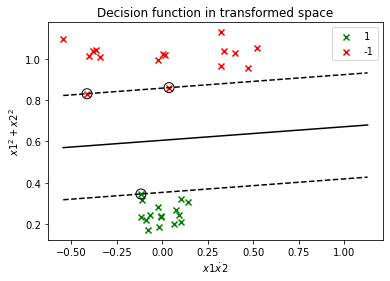

In [454]:
sv_trans = X_trans[index_sv]
points = np.linspace(X_trans.min(), X_trans.max(), num = 50)

surf = hyperplane(w_trans,points,'hyper')
upper = hyperplane(w_trans,points,'upper')
low = hyperplane(w_trans,points,'lower')

plt.scatter(X_trans[y==1,0], X_trans[y==1,1], c='g', marker='x', label = '1')
plt.scatter(X_trans[y==-1,0], X_trans[y==-1,1], c='r', marker='x', label = '-1')
plt.scatter(sv_trans[:,0],sv_trans[:,1], s=100, facecolors='none', edgecolors='k')
plt.plot(points,surf,c='k', linestyle='-')
plt.plot(points, upper, c='k',linestyle='--')
plt.plot(points, low, c='k',linestyle='--')
plt.xlabel('$x1 \dot x2$')
plt.ylabel('$x1^2 + x2^2$')
plt.title('Decision function in transformed space')
plt.legend();

#### 2

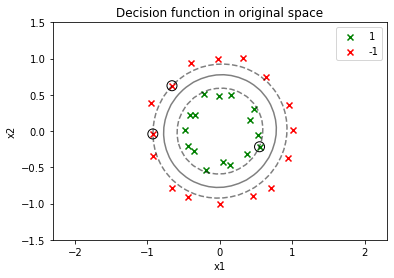

In [455]:
xx = np.linspace(-1.5, 1.5, num = 30)
yy = np.linspace(-1.5, 1.5, num = 30)
YY, XX = np.meshgrid(yy, xx)
Z = np.zeros((30 * 30,1))
k=0
for x1 in xx:
    for x2 in yy:
        Z[k] = w_trans[0]*x1*x2 + w_trans[1]*(x1**2 + x2**2) + w_trans[2]
        k += 1


plt.figure()
ax = plt.gca()
ax.contour(XX,YY,Z.reshape(XX.shape),colors='k',levels=[-1, 0, 1],alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(X[y==1,0], X[y==1,1], c='g', marker='x', label = '1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r', marker='x', label = '-1')
plt.scatter(sv[:,0],sv[:,1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Decision function in original space')
plt.legend()
plt.show(block=False) 


#### 3

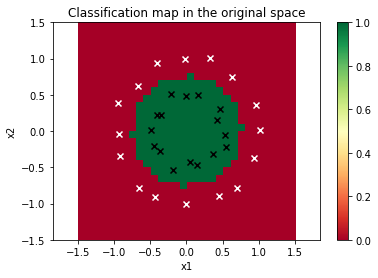

In [456]:
C = np.where(Z >= 0, 1, 0)
plt.figure()
plt.imshow(C.reshape(XX.shape), origin='lower', extent=(-1.5, 1.5, -1.5, 1.5), cmap='RdYlGn')
plt.colorbar()
plt.scatter(X[y==1,0], X[y==1,1], c='k', marker='x')
plt.scatter(X[y==-1,0], X[y==-1,1], c='w', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Classification map in the original space')
plt.show(block=False) 

### Apartado c)

In [457]:
def my_kernel (X,Z):
    K = np.zeros((X.shape[0], Z.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range (Z.shape[0]):
            K[i,j] = X[i,0]*X[i,1]*Z[j,0]*Z[j,1] + (X[i,0]**2)*(Z[j,0]**2) + (X[i,0]**2)*(Z[j,1]**2) + (X[i,1]**2)*(Z[j,0]**2) + (X[i,1]**2)*(Z[j,1]**2) #Kernel matrix
            
    return K

In [458]:
clf_p2c = svm.SVC(C = 1e16, kernel = my_kernel)
clf_p2c.fit(X, y)

SVC(C=1e+16, kernel=<function my_kernel at 0x7fdb3e713700>)

In [459]:
index_sv_orig = clf_p2c.support_
sv_orig = X[index_sv_orig]
sv_orig #coinciden con los calculados previamente

array([[-0.66221133,  0.62586231],
       [-0.92638604, -0.03965909],
       [ 0.54581596, -0.2162225 ]])

Ya que cuando no se utiliza un kernel lineal, no se devuelve el parámetro w (ya que no existe un hiperplano como tal), se recurre a calcular dicho parámetro directamente en el espacio transformado con un kernel lineal 

In [460]:
clf_p2c2 = svm.SVC(C = 1e16, kernel = 'linear')
clf_p2c2.fit(X_trans,y)
sv_trans = clf_p2c2.support_vectors_
w_trans = clf_p2c2.coef_.flatten()
w0_trans = clf_p2c2.intercept_.flatten()

In [461]:
sv_trans, w_trans, w0_trans

(array([[-0.41445311,  0.83022748],
        [ 0.03673962,  0.85976393],
        [-0.11801769,  0.34466724]]),
 array([ 0.2591515 , -3.95874505]),
 array([2.39438823]))

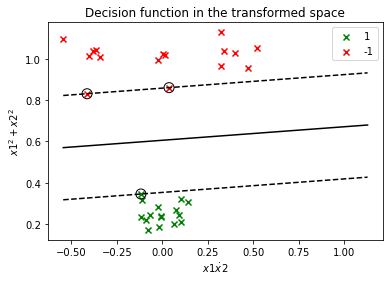

In [462]:
w_trans_comp = np.concatenate((w_trans,w0_trans))

points = np.linspace(X_trans.min(), X_trans.max(), num = 50)

surf = hyperplane(w_trans_comp,points,'hyper')
upper = hyperplane(w_trans_comp,points,'upper')
low = hyperplane(w_trans_comp,points,'lower')

plt.scatter(X_trans[y==1,0], X_trans[y==1,1], c='g', marker='x', label = '1')
plt.scatter(X_trans[y==-1,0], X_trans[y==-1,1], c='r', marker='x', label = '-1')
plt.scatter(sv_trans[:,0],sv_trans[:,1], s=100, facecolors='none', edgecolors='k')
plt.plot(points,surf,c='k', linestyle='-')
plt.plot(points, upper, c='k',linestyle='--')
plt.plot(points, low, c='k',linestyle='--')
plt.xlabel('$x1 \dot x2$')
plt.ylabel('$x1^2 + x2^2$')
plt.title('Decision function in the transformed space')
plt.legend()

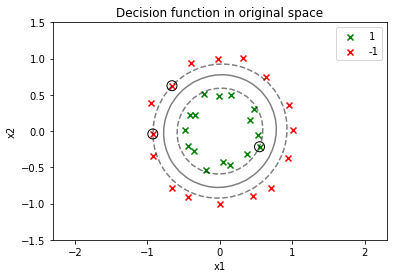

In [463]:
xx = np.linspace(-1.5, 1.5, num = 30)
yy = np.linspace(-1.5, 1.5, num = 30)
YY, XX = np.meshgrid(yy, xx)
Z = np.zeros((30 * 30,1))
k=0
for x1 in xx:
    for x2 in yy:
        Z[k] = w_trans_comp[0]*x1*x2 + w_trans_comp[1]*(x1**2 + x2**2) + w_trans_comp[2]
        k += 1


plt.figure()
ax = plt.gca()
ax.contour(XX,YY,Z.reshape(XX.shape),colors='k',levels=[-1, 0, 1],alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(X[y==1,0], X[y==1,1], c='g', marker='x', label = '1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r', marker='x', label = '-1')
plt.scatter(sv_orig[:,0],sv_orig[:,1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.axis('equal')
plt.title('Decision function in original space')
plt.show(block=False) 

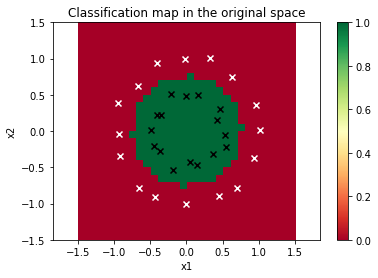

In [464]:
C = np.where(Z >= 0, 1, 0)
plt.figure()
plt.imshow(C.reshape(XX.shape), origin='lower', extent=(-1.5, 1.5, -1.5, 1.5), cmap='RdYlGn')
plt.colorbar()
plt.scatter(X[y==1,0], X[y==1,1], c='k', marker='x')
plt.scatter(X[y==-1,0], X[y==-1,1], c='w', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Classification map in the original space')
plt.show(block=False) 

### Apartado d)

In [465]:
rbf = svm.SVC(C = 1e6, kernel = 'rbf', gamma = 1)
rbf.fit(X,y)
sv_rbf = rbf.support_vectors_
sv_rbf

array([[-0.43771179, -0.91433595],
       [ 0.45171473, -0.89969812],
       [ 0.63167552,  0.74562728],
       [-0.66221133,  0.62586231],
       [-0.92638604, -0.03965909],
       [-0.02599576,  0.99625551],
       [-0.00244128, -1.01119991],
       [ 1.00856871,  0.01352739],
       [ 0.93322865, -0.36872917],
       [-0.21992084,  0.51764584],
       [ 0.54581596, -0.2162225 ],
       [-0.19028921, -0.53500731]])

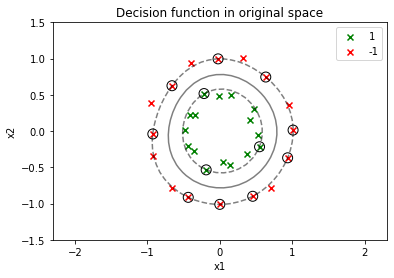

In [466]:
xx = np.linspace(-1.5, 1.5, num = 30)
yy = np.linspace(-1.5, 1.5, num = 30)
YY, XX = np.meshgrid(yy, xx)
Z = np.zeros((30 * 30,1))
k=0
for x1 in xx:
    for x2 in yy:
        Z[k] = rbf.decision_function([[x1,x2]])
        k += 1


plt.figure()
ax = plt.gca()
ax.contour(XX,YY,Z.reshape(XX.shape),colors='k',levels=[-1, 0, 1],alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(X[y==1,0], X[y==1,1], c='g', marker='x', label = '1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r', marker='x', label = '-1')
plt.scatter(sv_rbf[:,0], sv_rbf[:,1], s=100, facecolors='none', edgecolors='k')
plt.ylim([0,0.85])
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Decision function in original space')
plt.legend()
plt.show(block=False) 

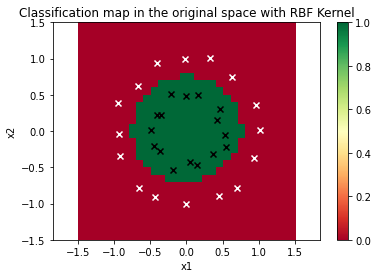

In [467]:
C = np.where(Z >= 0, 1, 0)
plt.figure()
plt.imshow(C.reshape(XX.shape), origin='lower', extent=(-1.5, 1.5, -1.5, 1.5), cmap='RdYlGn')
plt.colorbar()
plt.scatter(X[y==1,0], X[y==1,1], c='k', marker='x')
plt.scatter(X[y==-1,0], X[y==-1,1], c='w', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Classification map in the original space with RBF Kernel')
plt.show(block=False) 

In [468]:
rbf.dual_coef_

array([[-1.6326406 , -1.14400131, -1.30385874, -3.59535865, -0.56021008,
        -1.89724252, -0.30833892, -0.33072594, -2.16517376,  6.41920061,
         3.71097147,  2.80737844]])

Como no se está seguro de que este atributo sean los valores de las lambdas buscados, ya que no se comprende del todo si eso es lo que dice la documentación oficial de scikit, se procede a hallar dichas variables de forma analítica. 

Para ello únicamente se construye la matriz H con el kernel RBF.

In [469]:
def build_H_rbf(x, y, gamma):
    H = np.zeros((y.shape[0], y.shape[0])) #NxN matrix, where N = number of examples
    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            subs = x[i]-x[j]
            d = np.dot(subs.T, subs) #Euclidean square distance
            K = np.exp(-gamma*d) #RBF kernel
            H[i,j] = y[i]*y[j]*K
    
    return H

In [470]:
N = y.shape[0]
#y = y.reshape((N,))
gamma = 1

P = build_H_rbf(X, y, gamma)
q = -np.ones((N,))
G = -np.identity(N)
h = np.zeros((N,))
A = y.reshape((1,-1))
b = np.zeros(1)

lm = solve_qp(P, q, G, h, A, b, solver='cvxopt')
lm

array([4.01410370e-09, 5.12117976e-09, 6.42252874e+00, 1.64031484e+00,
       7.18475791e-09, 6.98417280e-09, 1.15692115e+00, 1.01900865e-07,
       5.82988763e-09, 5.49818760e-09, 1.29983408e+00, 9.56365501e-09,
       1.01958484e-06, 2.09443628e-08, 3.59721557e+00, 1.61764132e-08,
       1.53470575e-08, 3.70703306e+00, 2.80783863e+00, 1.59517371e-08,
       6.20219948e-09, 4.34966980e-09, 4.16798227e-09, 2.43255802e-08,
       1.07826194e-07, 5.58844343e-01, 1.90047808e+00, 7.74648713e-09,
       2.93477008e-01, 1.02530719e-08, 3.41357539e-01, 2.14895667e+00])

In [471]:
index_sv = np.where(lm>1e-06)
lm = lm[index_sv]

In [472]:
lm

array([6.42252874e+00, 1.64031484e+00, 1.15692115e+00, 1.29983408e+00,
       1.01958484e-06, 3.59721557e+00, 3.70703306e+00, 2.80783863e+00,
       5.58844343e-01, 1.90047808e+00, 2.93477008e-01, 3.41357539e-01,
       2.14895667e+00])

Efectivamente, el atributo dual_coef_ ofrece los valores de las lambdas. Sin embargo este paso era necesario para comprobar que era así.

In [473]:
lm.shape, sv_rbf.shape

((13,), (12, 2))

Sobra una lamda. Se observa que hay una con un valor de 1.019e-06, muy cercano a 1e-06. Se procede a comprobar si el vector asociado con esa lambda se incluye en los vectores de soporte ofrecidos por scikit

In [474]:
sv_temp = X[index_sv]
sv_temp

array([[-0.21992084,  0.51764584],
       [-0.43771179, -0.91433595],
       [ 0.45171473, -0.89969812],
       [ 0.63167552,  0.74562728],
       [-0.91741192, -0.35004573],
       [-0.66221133,  0.62586231],
       [ 0.54581596, -0.2162225 ],
       [-0.19028921, -0.53500731],
       [-0.92638604, -0.03965909],
       [-0.02599576,  0.99625551],
       [-0.00244128, -1.01119991],
       [ 1.00856871,  0.01352739],
       [ 0.93322865, -0.36872917]])

In [475]:
sv_rbf

array([[-0.43771179, -0.91433595],
       [ 0.45171473, -0.89969812],
       [ 0.63167552,  0.74562728],
       [-0.66221133,  0.62586231],
       [-0.92638604, -0.03965909],
       [-0.02599576,  0.99625551],
       [-0.00244128, -1.01119991],
       [ 1.00856871,  0.01352739],
       [ 0.93322865, -0.36872917],
       [-0.21992084,  0.51764584],
       [ 0.54581596, -0.2162225 ],
       [-0.19028921, -0.53500731]])

Efectivamente el vector asociado con esa lambda no ha sido seleccionado por scikit. 

In [476]:
rbf.intercept_

array([-1.68204171])

## Problema 3

### Apartado a)

In [477]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn import metrics
import pandas as pd

In [478]:
group = '02'
ds = 34
path = './in/datasets02/'
data_train = np.loadtxt(path+'ds'+group+str(ds)+'tr.txt')
data_test = np.loadtxt(path+'ds'+group+str(ds)+'te.txt')

X_train = data_train[:,0:2]
y_train = data_train[:,2:3]

X_test = data_test[:,0:2]
y_test = data_test[:,2:3]

In [479]:
y_train = [1 if y==1 else -1 for y in y_train]
y_test = [1 if y==1 else -1 for y in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [480]:
def normalization (x):
    return ((x-x.min())/(x.max()-x.min()))

In [481]:
parameters_linear = {'kernel':['linear'], 'C':[1e-02,1,1e02]}
parameters_poly = {'kernel':['poly'], 'gamma': [1], 'coef0': [1], 'degree': [2,3],'C':[1e-1,10,1e03]}
parameters_rbf = {'kernel':['rbf'], 'gamma': [1,2],'C':[1e-02,10,1e03]}


scoring = 'accuracy'
cv = 10

### Apartado b)

In [482]:
X_train_norm = normalization(X_train)

In [483]:
svc = svm.SVC()


clf_linear = GridSearchCV(svc, parameters_linear, scoring = scoring, cv = cv)
clf_poly = GridSearchCV(svc, parameters_poly, scoring = scoring, cv = cv)
clf_rbf = GridSearchCV(svc, parameters_rbf, scoring = scoring, cv = cv)

In [484]:
#clf.fit(X_train_norm, y_train)
clf_linear.fit(X_train_norm, y_train)
clf_poly.fit(X_train_norm, y_train)
clf_rbf.fit(X_train_norm, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 10, 1000.0], 'gamma': [1, 2],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [485]:
best_linear = clf_linear.best_score_
best_poly = clf_poly.best_score_
best_rbf = clf_rbf.best_score_

print('Best mean linear accuracy: ', best_linear, '\n', 
      'Best mean poly accuracy: ', best_poly, '\n', 
      'Best mean RBF accuracy: ', best_rbf)

Best mean linear accuracy:  0.7333333333333334 
 Best mean poly accuracy:  0.8458333333333332 
 Best mean RBF accuracy:  0.875


In [486]:
best_clf = clf_rbf.best_estimator_
best_sv = best_clf.support_vectors_

In [487]:
best_clf

SVC(C=1000.0, gamma=2)

### Apartado c)

#### 1

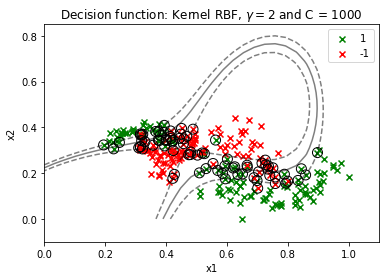

In [488]:
xx = np.linspace(0, 1, num = 30)
yy = np.linspace(0, 1, num = 30)
YY, XX = np.meshgrid(yy, xx)
Z = np.zeros((30 * 30,1))
k=0
for x1 in xx:
    for x2 in yy:
        Z[k] = clf_rbf.decision_function([[x1,x2]])
        k += 1


plt.figure()
ax = plt.gca()
ax.contour(XX,YY,Z.reshape(XX.shape),colors='k',levels=[-1, 0, 1],alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(X_train_norm[y_train==1,0], X_train_norm[y_train==1,1], c='g', marker='x', label = '1')
plt.scatter(X_train_norm[y_train==-1,0], X_train_norm[y_train==-1,1], c='r', marker='x', label = '-1')
plt.scatter(best_sv[:,0], best_sv[:,1], s=100, facecolors='none', edgecolors='k')
plt.ylim([-0.1,0.85])
plt.xlim([0,1.1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision function: Kernel RBF, $\gamma = 2$ and C = 1000 ')
plt.legend()
plt.show(block=False)

#### 2

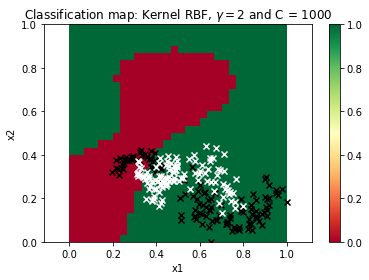

In [489]:
C = np.where(Z >= 0, 1, 0)
plt.figure()
plt.imshow(C.reshape(XX.shape), origin='lower', extent=(0, 1, 0, 1), cmap='RdYlGn')
plt.colorbar()
plt.scatter(X_train_norm[y_train==1,0], X_train_norm[y_train==1,1], c='k', marker='x')
plt.scatter(X_train_norm[y_train==-1,0], X_train_norm[y_train==-1,1], c='w', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Classification map: Kernel RBF, $\gamma = 2$ and C = 1000')
plt.show(block=False)

Se puede observar que ha habido algo que ha ido mal a la hora de graficar o evaluar la función de decisión, ya que el mapa de clasificación aparece desplazado hacia la izquierda respecto de la función de decisión. Sin embargo, dado que ha sido un error de última hora, no se ha podido solucionar. 

### Apartado d)

#### 1

In [490]:
X_test_norm = normalization(X_test)

In [491]:
y_predict = best_clf.predict(X_test_norm)

In [492]:
accuracy = best_clf.score(X_test_norm, y_test)
precision = metrics.precision_score(y_test, y_predict)
recall = metrics.recall_score(y_test, y_predict)
f1 = metrics.f1_score(y_test,y_predict)

print ('Accuracy: ', accuracy, '\n',
       'Precision: ', precision,'\n',
      'Recall: ', recall, '\n', 
      'F1: ', f1)

Accuracy:  0.8833333333333333 
 Precision:  0.8695652173913043 
 Recall:  0.8333333333333334 
 F1:  0.851063829787234


#### 2

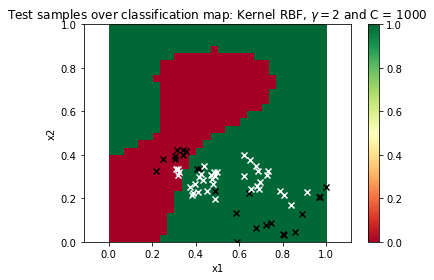

In [493]:
C_test = np.where(Z >= 0, 1, 0)
plt.figure()
plt.imshow(C_test.reshape(XX.shape), origin='lower', extent=(0, 1, 0, 1), cmap='RdYlGn')
plt.colorbar()
plt.scatter(X_test_norm[y_test==1,0], X_test_norm[y_test==1,1], c='k', marker='x')
plt.scatter(X_test_norm[y_test==-1,0], X_test_norm[y_test==-1,1], c='w', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Test samples over classification map: Kernel RBF, $\gamma = 2$ and C = 1000')
plt.show(block=False)

De nuevo se observa que el mapa de clasificación aparece desplazado. Sin embargo en este caso sí que queda explícito el hecho de que hay un error en la forma de realizar la gráfica y no en la función de decisión en si, ya no existe una concordancia entre las métricas del test (valores altos, indicando una buena clasificación) con lo que se ve en este mapa.

### Apartado e)

In [494]:
X_norm = np.concatenate((X_train_norm, X_test_norm))
y = np.concatenate((y_train,y_test))

In [495]:
metric = ['accuracy', 'precision', 'recall']
scores = cross_validate(best_clf, X_norm, y, scoring = metrics)

In [496]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.018035,0.003245,0.866667,0.892857,0.833333
1,0.002984,0.002252,0.883333,0.896552,0.866667
2,0.003091,0.002248,0.883333,0.925926,0.833333
3,0.003597,0.002021,0.816667,0.880000,0.733333
4,0.003639,0.001887,0.900000,0.928571,0.866667


## Problema 4

### Apartado a)

In [528]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn import metrics
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [529]:
group = '02'
ds = 34
path = './in/datasets02/'
data_train = np.loadtxt(path+'ds'+group+str(ds)+'tr.txt')
data_test = np.loadtxt(path+'ds'+group+str(ds)+'te.txt')

X_train = data_train[:,0:2]
y_train = data_train[:,2:3]

X_test = data_test[:,0:2]
y_test = data_test[:,2:3]

In [530]:
y_train = y_train.reshape((y_train.shape[0],))
y_test = y_test.reshape((y_test.shape[0],))

In [531]:
parameters = {'n_neighbors':[1,5], 
             'weights': ['uniform','distance'],
             'algorithm': ['brute','kd_tree'], 
             'p':[1,2]} #manhattan and Euclidean distances

cv = 10
scoring = 'accuracy'

### Apartado b)

In [532]:
X_train_norm = normalization(X_train)

In [533]:
knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, parameters, scoring = scoring, cv = cv)

In [534]:
grid_knn.fit(X_train_norm, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'kd_tree'],
                         'n_neighbors': [1, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [535]:
grid_knn_results = pd.DataFrame (grid_knn.cv_results_)
grid_knn_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001110,0.001123,0.002760,0.002866,brute,1,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.916667,...,0.875,0.833333,0.958333,0.916667,0.875,0.833333,0.875000,0.883333,0.052042,9
1,0.000541,0.000095,0.000935,0.000227,brute,1,1,distance,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.916667,...,0.875,0.833333,0.958333,0.916667,0.875,0.833333,0.875000,0.883333,0.052042,9
2,0.000647,0.000190,0.002069,0.000409,brute,1,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.791667,...,0.875,0.833333,0.958333,0.916667,0.875,0.833333,0.875000,0.875000,0.045644,13
3,0.000553,0.000079,0.001221,0.000518,brute,1,2,distance,"{'algorithm': 'brute', 'n_neighbors': 1, 'p': ...",0.791667,...,0.875,0.833333,0.958333,0.916667,0.875,0.833333,0.875000,0.875000,0.045644,13
4,0.000714,0.000311,0.001863,0.000317,brute,5,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': ...",0.833333,...,0.875,0.875000,1.000000,0.916667,0.875,0.833333,0.958333,0.912500,0.060237,3
5,0.000635,0.000227,0.001051,0.000155,brute,5,1,distance,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': ...",0.833333,...,0.875,0.875000,1.000000,0.875000,0.875,0.833333,0.916667,0.900000,0.056519,7
6,0.000772,0.000307,0.003414,0.002629,brute,5,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': ...",0.875000,...,0.875,0.875000,1.000000,0.916667,0.875,0.833333,0.958333,0.916667,0.055902,1
7,0.001527,0.000818,0.003195,0.001831,brute,5,2,distance,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': ...",0.875000,...,0.875,0.875000,1.000000,0.916667,0.875,0.833333,0.916667,0.908333,0.052042,5
8,0.000767,0.000242,0.001878,0.000243,kd_tree,1,1,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p'...",0.916667,...,0.875,0.833333,0.958333,0.916667,0.875,0.833333,0.875000,0.883333,0.052042,9
9,0.000623,0.000081,0.001128,0.000149,kd_tree,1,1,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p'...",0.916667,...,0.875,0.833333,0.958333,0.916667,0.875,0.833333,0.875000,0.883333,0.052042,9


In [536]:
best_knn = grid_knn.best_estimator_
best_knn

KNeighborsClassifier(algorithm='brute')

In [537]:
print('Best mean score (accuracy) obtained in the grid search: ', grid_knn.best_score_)

Best mean score (accuracy) obtained in the grid search:  0.9166666666666667


### Apartado c)

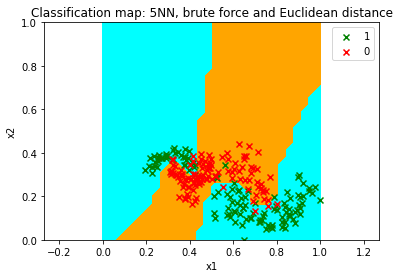

In [538]:
cmap_light = ListedColormap(['orange', 'cyan'])

xx = np.linspace(0, 1, num = 30)
yy = np.linspace(0, 1, num = 30)
YY, XX = np.meshgrid(yy, xx)

Z = grid_knn.predict(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape) 

plt.figure()
ax = plt.gca()
ax.contourf(XX,YY,Z, cmap = cmap_light)
plt.scatter(X_train_norm[y_train==1,0], X_train_norm[y_train==1,1], c='g', marker='x', label = '1')
plt.scatter(X_train_norm[y_train==0,0], X_train_norm[y_train==0,1], c='r', marker='x', label = '0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Classification map: 5NN, brute force and Euclidean distance')
plt.legend()
plt.show(block=False) 

### Apartado d)

#### 1

In [539]:
X_test_norm = normalization(X_test)

In [540]:
y_predict = grid_knn.predict(X_test_norm)

In [541]:
accuracy = best_knn.score(X_test_norm, y_test)
precision = metrics.precision_score(y_test, y_predict)
recall = metrics.recall_score(y_test, y_predict)
f1 = metrics.f1_score(y_test,y_predict)

print ('Accuracy: ', accuracy, '\n',
       'Precision: ', precision,'\n',
      'Recall: ', recall, '\n', 
      'F1: ', f1)

Accuracy:  0.9166666666666666 
 Precision:  0.8518518518518519 
 Recall:  0.9583333333333334 
 F1:  0.9019607843137256


#### 2

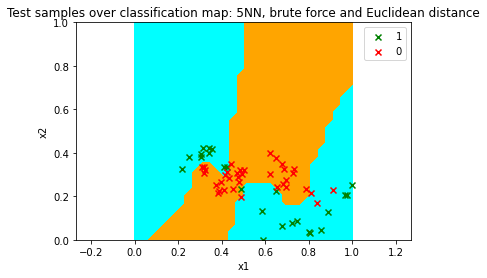

In [542]:
plt.figure()
ax = plt.gca()
ax.contourf(XX,YY,Z, cmap = cmap_light)
plt.scatter(X_test_norm[y_test==1,0], X_test_norm[y_test==1,1], c='g', marker='x', label = '1')
plt.scatter(X_test_norm[y_test==0,0], X_test_norm[y_test==0,1], c='r', marker='x', label = '0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('Test samples over classification map: 5NN, brute force and Euclidean distance')
plt.legend()
plt.show(block=False) 

### Apartado e)

In [543]:
X_norm = np.concatenate((X_train_norm, X_test_norm))
y = np.concatenate((y_train,y_test))

In [544]:
metrics = ['accuracy', 'precision', 'recall']
scores = cross_validate(best_knn, X_norm, y, scoring = metrics)

In [545]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.004258,0.009386,0.916667,0.931034,0.900000
1,0.000732,0.004758,0.916667,0.903226,0.933333
2,0.000750,0.004976,0.966667,0.937500,1.000000
3,0.000494,0.005348,0.866667,0.892857,0.833333
4,0.000552,0.005680,0.933333,0.906250,0.966667
